# Laboratorio 1 - Pregunta 1
### Hecho por: Daniel Alonso, Álvaro García Cid, Enrique Ramos e Ignacio Regidor

##Resumen
En está práctica se estudiará una base de datos de Airbnb con información de diversos apartamentos de la ciudad de Nueva York, alquilados durante los últimos años.

A partir de estos datos, se realizará una clasificación en cuanto a popularidad, que dependerá de las reseñas por mes y la disponibilidad.

A continuación, de esta clasificiación se obtendrán  los más populares, para estudiarlos de forma gráfica (diagramas).

Esto, se realizará de forma similar diferenciando si el alquiler es de una habitación o del apartamento entero; y la manera en la que puede afectar esto.

Finalmente, se evaluará también de forma gráfica la tendencia al aumento de reseñas durante los últimos años.

##Introducción al problema y pasos previos
A continuación se muestrán las librerías de Python utilizadas en esta práctica.
- Numpy: utilizada por el resto de liberías, permite la creación y el manejo de datos de forma rápida y eficiente, conteniendo estructuras de datos propias.
- Pandas: permite la creación y manejo de dataframes a partir de la base de datos empleada.
- Matplotlib.pyplot: se utilizará para graficar los distintos diagramas que permitan el estudio de los datos de forma visual.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Preprocesamiento de los datos

Se procede a importar la base de datos contenida en un archivo .csv

Se guarda en una variable <i>dataframe</i> creada con la librería pandas a la que se le llamará "datosraw".

También se muestran 5 apartamentos de este dataframe con la función .head() para observar los nombres y tipos de sus distintos atributos.

In [ ]:
datosraw = pd.read_csv("airbnb.csv", encoding='latin-1')
datosraw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


A continuación, con la función .shape, se obtiene que la base de datos contiene 48895 apartamentos, cada uno con 16 atributos diferentes.

In [ ]:
datosraw.shape

(48895, 16)

En el siguiente paso, se buscan valores duplicados para su posterior eliminación.

Sin embargo, con la función duplicated() aplicada a cada columna del dataframe, obervamos que ninguna coincide en el atributo "id".

Esto, quiere decir que no hay apartamentos exactamente iguales que aparezcan más de una vez; y que este atributo es la clave primaria de los apartamentos, es decir, el identificador que los distingue de los demás.

In [ ]:
for c in datosraw.columns:
  print("Duplicated Values [{0}]:".format(c), datosraw[c].duplicated().sum())

Duplicated Values [id]: 0
Duplicated Values [name]: 989
Duplicated Values [host_id]: 11438
Duplicated Values [host_name]: 37442
Duplicated Values [neighbourhood_group]: 48890
Duplicated Values [neighbourhood]: 48674
Duplicated Values [latitude]: 29847
Duplicated Values [longitude]: 34177
Duplicated Values [room_type]: 48892
Duplicated Values [price]: 48221
Duplicated Values [minimum_nights]: 48786
Duplicated Values [number_of_reviews]: 48501
Duplicated Values [last_review]: 47130
Duplicated Values [reviews_per_month]: 47957
Duplicated Values [calculated_host_listings_count]: 48848
Duplicated Values [availability_365]: 48529


Antes de filtrar y eliminar o modificar los datos que no sean útiles, se seleccionan solo los atributos que sean relevantes.

De esta forma, se evita por ejemplo, ignorar la información de un apartamento que contenga un valor nulo en un atributo que no sea de interés para el objetivo de la práctica.

Los atributos utilizados serán:
- id: identificador de cada apartamento.
- room_type: si se puede alquilar el apartamento entero, una habitación privada o una habitación compartida.
- last_review: la fecha de la última reseña publicada.
- reviews_per_month: media de reseñas mensuales.
- availability_365: días disponibles que el apartamento puede ser alquilado en un año.

## Pregunta 1

In [ ]:
datos = datosraw[['id','neighbourhood_group','neighbourhood','room_type','price','last_review','reviews_per_month','availability_365']]
datos.head()


,id,neighbourhood_group,neighbourhood,room_type,price,last_review,reviews_per_month,availability_365
0,2539,Brooklyn,Kensington,Private room,149,2018-10-19,0.21,365
1,2595,Manhattan,Midtown,Entire home/apt,225,2019-05-21,0.38,355
2,3647,Manhattan,Harlem,Private room,150,NaN,NaN,365
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,2019-07-05,4.64,194
4,5022,Manhattan,East Harlem,Entire home/apt,80,2018-11-19,0.10,0


Una vez seleccionados los atributos, buscamos los apartamentos que tengan valores nulos para alguno de estos.

In [ ]:
for c in datos.columns:
  print("Missing Values [{0}]:".format(c), datos[c].isna().sum())

Missing Values [id]: 0
Missing Values [neighbourhood_group]: 0
Missing Values [neighbourhood]: 0
Missing Values [room_type]: 0
Missing Values [price]: 0
Missing Values [last_review]: 10052
Missing Values [reviews_per_month]: 10052
Missing Values [availability_365]: 0


Para los valores nulos en la media de reseñas mensual, se debe estudiar el número de valores nulos en el atributo number_of_reviews (correspondiente al atributo del número de visitas totales del dataframe original). 

- Si tienen un valor similar de nulos estos atributos, querrá decir que hay una falta general de información y lo mejor será eliminar estos apartamentos del estudio. 

- Si el valor de nulos en reseñas totales es bastante bajo en comparación con la media, querrá decir que no se ha realizado el cálculo de la media de reseñas de cualquier apartamento que tenga un valor de 0 reseñas totales, asignándole directamente un nulo. Para esta segunda situación, se convierte a 0 los valores nulos del atributo correspondiente a la media de reseñas. 

- Finalmente, existe una tercera opción, en la que se da una combinación de las dos anteriores. En este caso, habría que tratar los dos casos por separado.

A partir de estos valores, se deduce que hay 10052 apartamentos que no tienen media mensual de reseñas ni de la fecha de la última reseña. De esto podemos concluir que el valor nulo se debe a la falta de reseñas. Como no existe ninguna reseña no hay fecha de la última reseña. Además, debido a lo mismo, a la hora de hacer la media de reseñas por mes y dividir entre cero (no existe) devuelve valor nulo. Para confirmarlo veamos si falta algún valor de la columna _'number_of_reviews'_

In [ ]:
print("Missing Values:", datosraw[['number_of_reviews']].isna().sum())

Missing Values: number_of_reviews    0
dtype: int64


Como el número de nulos es 0, confirmamos la situación planteada previamente.
Se deben convertir los nulos a 0, pero esto para valores de tipo fecha como la última reseña registrada no tiene sentido.
Como este atributo solo se utilizará en la parte final del estudio, los datos se dividirán en 2 dataframes distintos:
- datos1: se elimina el atributo de la última reseña registrada y se convierten los nulos a 0.
- datos4: el procesamiento de este dataframe se realizará posteriormente (apartado 4).

In [ ]:
datos1 = datos[['id','neighbourhood_group','neighbourhood','room_type','price','reviews_per_month','availability_365']]
datos1 = datos1.fillna(0)

In [ ]:
datos1.head()

,id,neighbourhood_group,neighbourhood,room_type,price,reviews_per_month,availability_365
0,2539,Brooklyn,Kensington,Private room,149,0.21,365
1,2595,Manhattan,Midtown,Entire home/apt,225,0.38,355
2,3647,Manhattan,Harlem,Private room,150,0.00,365
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,4.64,194
4,5022,Manhattan,East Harlem,Entire home/apt,80,0.10,0


Utilizamos un gráfico Boxplot para ver los outliers y poder obtener el máximo y el mínimo de los rangos para posteriormente poder hacer la división de los datos en los tres rangos (Baja, Media, Alta). 

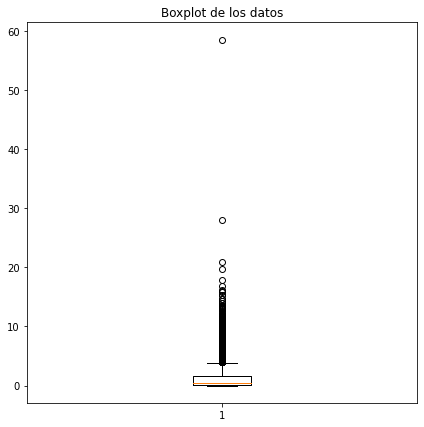

In [ ]:
import matplotlib.pyplot as plt
media_reviews = datos1['reviews_per_month']
plt.figure(figsize=(7,7))
plt.boxplot(media_reviews)
plt.title("Boxplot de los datos")
plt.show()

In [ ]:
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(media_reviews)
stats = stats[0]
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

-2.27 3.89 3312


Mediante estas fórmulas (min = q1-1.5*iqr; max = q3+1.5*iqr), podemos calcular el mínimo y el máximo del boxplot. También calculamos la cantidad de outliers que obtenemos. 

Esto lo hacemos para dividir los datos en 3 grupos como se pide en el enunciado, por lo que creamos una nueva columna que llamamos "et_reseñas" en la que asignaremos a que grupo pertenece cada apartamento según la media de reseñas que haya recibido, además se crea también la columna "et_disponibilidad" donde se clasificará cada apartamento en función de su disponibilidad en diversos rangos. 

Por último, se crean dos columnas más que corresponden a la valoración en función de unas reglas establecidas según haya sido clasificado el airbnb en las columnas "et_reseñas" y "et_disponibilidad" y puntuación será el valor numérico asociado a la valoración.

In [ ]:
datos1['et_reseñas']=media_reviews
datos1['et_disponibilidad']= datos1['availability_365']
datos1['valoración']=0
datos1['puntuación']=0
datos1.head()

,id,neighbourhood_group,neighbourhood,room_type,price,reviews_per_month,availability_365,et_reseñas,et_disponibilidad,valoración,puntuación
0,2539,Brooklyn,Kensington,Private room,149,0.21,365,0.21,365,0,0
1,2595,Manhattan,Midtown,Entire home/apt,225,0.38,355,0.38,355,0,0
2,3647,Manhattan,Harlem,Private room,150,0.00,365,0.00,365,0,0
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,4.64,194,4.64,194,0,0
4,5022,Manhattan,East Harlem,Entire home/apt,80,0.10,0,0.10,0,0,0


Se realiza la clasificación de los airbnb según sus reseñas en mensuales en tres grupos, para realizar estos grupos se toman los valores máximos y mínimo obtenidos en el boxplot previo (el mínimo pasa a ser 0 ya que no existen valores menores que 0 en el número de reseñas al mes).

Otra parte importante es la decisión de que hacer con los outliers, en este caso, se deben incluir en el grupo "ALTA", ya que son outliers por encima del máximo y estos airbnb no pueden ser eliminados porque realmente son los mejores por tanto, si se eliminan no estaríamos realizando un estudio correcto de los barrios.

In [ ]:
datos1['et_reseñas']= datos1['et_reseñas'].replace(to_replace=np.around(np.linspace(0,1.3,131),decimals=2),value="BAJA")
datos1['et_reseñas']= datos1['et_reseñas'].replace(to_replace=np.around(np.linspace(1.31,2.6,130),decimals=2),value="MEDIA")
datos1['et_reseñas']= datos1['et_reseñas'].replace(to_replace=np.around(np.linspace(2.61,60,5740),decimals=2),value="ALTA")
datos1.head()



,id,neighbourhood_group,neighbourhood,room_type,price,reviews_per_month,availability_365,et_reseñas,et_disponibilidad,valoración,puntuación
0,2539,Brooklyn,Kensington,Private room,149,0.21,365,BAJA,365,0,0
1,2595,Manhattan,Midtown,Entire home/apt,225,0.38,355,BAJA,355,0,0
2,3647,Manhattan,Harlem,Private room,150,0.00,365,BAJA,365,0,0
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,4.64,194,ALTA,194,0,0
4,5022,Manhattan,East Harlem,Entire home/apt,80,0.10,0,BAJA,0,0,0


Hacemos lo mismo que en la columna "et_reseñas" pero esta vez con la disponibilidad de los apartamentos.

In [ ]:
datos1['et_disponibilidad']= datos1['et_disponibilidad'].replace(to_replace=range(0,121),value="POCO DISPONIBLE")
datos1['et_disponibilidad']= datos1['et_disponibilidad'].replace(to_replace=range(122,243),value="DISPONIBLE NORMALMENTE")
datos1['et_disponibilidad']= datos1['et_disponibilidad'].replace(to_replace=range(244,366),value="ALTAMENTE DISPONIBLE")
datos1.head()

,id,neighbourhood_group,neighbourhood,room_type,price,reviews_per_month,availability_365,et_reseñas,et_disponibilidad,valoración,puntuación
0,2539,Brooklyn,Kensington,Private room,149,0.21,365,BAJA,ALTAMENTE DISPONIBLE,0,0
1,2595,Manhattan,Midtown,Entire home/apt,225,0.38,355,BAJA,ALTAMENTE DISPONIBLE,0,0
2,3647,Manhattan,Harlem,Private room,150,0.00,365,BAJA,ALTAMENTE DISPONIBLE,0,0
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,4.64,194,ALTA,DISPONIBLE NORMALMENTE,0,0
4,5022,Manhattan,East Harlem,Entire home/apt,80,0.10,0,BAJA,POCO DISPONIBLE,0,0


Con el siguiente bucle asignamos la valoración a cada apartamento según las directrices que nos da el enunciado.

Para poder conocer el ranking de mejores barrios, asignamos un valor numérico a cada valoración. Siendo, Muy Malo = 1; Malo = 2; regular = 3;
Bueno = 4 y Muy Bueno = 5.

In [ ]:
for i in range(0,48895):
  if datos1['et_reseñas'][i]=='BAJA':
    if datos1['et_disponibilidad'][i]=='POCO DISPONIBLE':
      datos1['valoración'][i]='BUENO'
      datos1['puntuación'][i]=4
    elif datos1['et_disponibilidad'][i]=='DISPONIBLE NORMALMENTE':
      datos1['valoración'][i]='REGULAR'
      datos1['puntuación'][i]=3
    elif datos1['et_disponibilidad'][i]=='ALTAMENTE DISPONIBLE':
      datos1['valoración'][i]='MALO'
      datos1['puntuación'][i]=2
  elif datos1['et_reseñas'][i]=='MEDIA':
    if datos1['et_disponibilidad'][i]=='POCO DISPONIBLE':
      datos1['valoración'][i]='BUENO'
      datos1['puntuación'][i]=4
    elif datos1['et_disponibilidad'][i]=='DISPONIBLE NORMALMENTE':
      datos1['valoración'][i]='REGULAR'
      datos1['puntuación'][i]=3
    elif datos1['et_disponibilidad'][i]=='ALTAMENTE DISPONIBLE':
      datos1['valoración'][i]='MALO'
      datos1['puntuación'][i]=2
  elif datos1['et_reseñas'][i]=='ALTA':
    if datos1['et_disponibilidad'][i]=='POCO DISPONIBLE':
      datos1['valoración'][i]='MUY BUENO'
      datos1['puntuación'][i]=5
    elif datos1['et_disponibilidad'][i]=='DISPONIBLE NORMALMENTE':
      datos1['valoración'][i]='BUENO'
      datos1['puntuación'][i]=4
    elif datos1['et_disponibilidad'][i]=='ALTAMENTE DISPONIBLE':
      datos1['valoración'][i]='MUY MALO'
      datos1['puntuación'][i]=1

<ipython-input-15-cb397ebfc4c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['valoración'][i]='MALO'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-15-cb397ebfc4c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['puntuación'][i]=2
<ipython-input-15-cb397ebfc4c6>:28: SettingWithCopyWar

In [ ]:
datos1.head()

,id,neighbourhood_group,neighbourhood,room_type,price,reviews_per_month,availability_365,et_reseñas,et_disponibilidad,valoración,puntuación
0,2539,Brooklyn,Kensington,Private room,149,0.21,365,BAJA,ALTAMENTE DISPONIBLE,MALO,2
1,2595,Manhattan,Midtown,Entire home/apt,225,0.38,355,BAJA,ALTAMENTE DISPONIBLE,MALO,2
2,3647,Manhattan,Harlem,Private room,150,0.00,365,BAJA,ALTAMENTE DISPONIBLE,MALO,2
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,4.64,194,ALTA,DISPONIBLE NORMALMENTE,BUENO,4
4,5022,Manhattan,East Harlem,Entire home/apt,80,0.10,0,BAJA,POCO DISPONIBLE,BUENO,4


Con la función .groupby agrupamos todos los airbnb que pertenecen al mismo barrio y con la función .mean calculamos la media de cada una de las columnas numéricas que contiene nuestro dataframe con el fin de quedarnos con la puntuación media de cada barrio, que será aquella que nos permita clasificar los barrios según su popularidad/calidad.

Como el objetivo de este apartado es conocer que posición ocupa el barrio de Williamsburg en esta clasificación ordenamos el dataframe en función de la columna putuación media de cada barrio en orden descendente.


In [ ]:
barrios = datos1.groupby(datos1.neighbourhood).mean()
punt=barrios['puntuación']
barrios=barrios.sort_values(by=['puntuación'],ascending=False).reset_index()
barrios.head()

,neighbourhood,id,price,reviews_per_month,availability_365,puntuación
0,New Springville,2.327877e+07,76.0,2.3575,65.25,4.5
1,Rossville,2.625835e+07,75.0,1.6900,59.00,4.0
2,Woodrow,1.798271e+06,700.0,0.0000,0.00,4.0
3,"Bay Terrace, Staten Island",2.671170e+07,102.5,0.4550,0.00,4.0
4,New Dorp,2.359732e+07,57.0,0.0000,0.00,4.0


Una vez tenemos el dataframe ordenado solamente falta buscar la posición en la cual se encuentra Williamsburg

In [ ]:
print(barrios.loc[barrios['neighbourhood']=='Williamsburg'])

   neighbourhood            id       price  reviews_per_month  \
23  Williamsburg  1.754875e+07  143.802806           0.886676   

    availability_365  puntuación  
23         74.722704    3.668622  


Podemos observar que el barrio Williamsburg es el número 24 de la lista con más puntuación con una media de 3.66. 

## Pregunta 2 Diagrama Burbuja


Para este nuevo apartado, creamos un nuevo DataFrame en el que introducimos las columnas del DataFrame (datosraw) que se observan a continuación. 

En este apartado a diferencia del anterior la columna que va a permitirnos clasificar los barrios será "number_of_reviews", ya que con ella podemos saber el número total de reseñas que tiene que cada airbnb y por tanto el barrio más popular será aquel cuyos airbnb tengan mayor número de reseñas.

In [ ]:
datos2 = datosraw[['id','neighbourhood_group','neighbourhood','room_type','price','number_of_reviews'	]]
datos2.head()

,id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
0,2539,Brooklyn,Kensington,Private room,149,9
1,2595,Manhattan,Midtown,Entire home/apt,225,45
2,3647,Manhattan,Harlem,Private room,150,0
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,270
4,5022,Manhattan,East Harlem,Entire home/apt,80,9


A continuación, agrupamos los datos del DataFrame (datos2) según el barrio en el que se encuentre el piso. De esta manera, podemos observar el número total de reseñas y elegiremos los 5 mejores en esta característica para continuar con nuestro analisis.

Tras haber agrupado los datos en barrios y haber realizado un sumatorio de todas las columnas con variables numéricas, antes de ordenar el dataframe se debe añadir la columna puntuación, esta columna es la correspondiente a la puntuación media de los barrios que ha sido calculada anteriormente. Se necesita esta columna para realizar el gráfico de burbuja que nos permitirá estudiar como son los 5 barrios más populares.

In [ ]:
barrios2 = datos2.groupby(datos2.neighbourhood).sum()
barrios2['puntuación']=punt
barrios2 = barrios2.sort_values(by=['number_of_reviews'],ascending=False).reset_index()
cincomejores = barrios2[0:5]
print(cincomejores)

        neighbourhood           id   price  number_of_reviews  puntuación
0  Bedford-Stuyvesant  71288376210  399917             110352    3.439957
1        Williamsburg  68791112560  563707              85427    3.668622
2              Harlem  47113859448  316233              75962    3.508277
3            Bushwick  49887640020  209033              52514    3.570791
4      Hell's Kitchen  41406631290  400987              50227    3.366701


Creamos el DataFrame llamado burbuja en el que almacenaremos los datos de los 5 mejores barrios, según su popularidad. Datos que obtuvimos anteriormente.

In [ ]:
burbuja = pd.DataFrame(cincomejores)
burbuja.head()

,neighbourhood,id,price,number_of_reviews,puntuación
0,Bedford-Stuyvesant,71288376210,399917,110352,3.439957
1,Williamsburg,68791112560,563707,85427,3.668622
2,Harlem,47113859448,316233,75962,3.508277
3,Bushwick,49887640020,209033,52514,3.570791
4,Hell's Kitchen,41406631290,400987,50227,3.366701


Creamos el gráfico de tipo burbuja en el cual el eje x representa los 5 mejores barrios, el eje y representa la media de puntuación de estos barrios mientras que el tamaño de las burbujas (s) representa el número total de reseñas que han recibido los airbnbs en estos barrios.

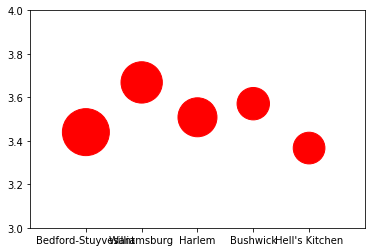

In [ ]:
x = burbuja['neighbourhood']
y = burbuja['puntuación']
s = burbuja['number_of_reviews']/50
plt.scatter(x, y,s=s, color='red')
plt.axis([-1,5,3,4])
plt.show()

Observando este gráfico podemos decir que el eje x, no aporta ningún tipo de información a parte de los nombres que nos permiten ver de forma más clara el gráfico. En cuanto a la media de puntuación de cada uno de los barrios se podría decir que más o menos todos se encuentran en un rango parecido, siendo "Williamsburg" el que mejor puntuación media tiene de los cinco.

Pero, si empezamos a tener en cuenta tanto el eje y, como el tamaño de las burbujas, se puede decir que Williamsburg además de ser el barrio con mejor puntuación de los cinco es el segundo más popular, con lo cual se puede concluir que sus airbnb son de buena calidad ya que son populares y tienen puntuaciones altas.

En cambio el barrio "Bedford-Stuyvesant", es el barrio más popular y se aprecia notablemente por el tamaño de la burbuja respecto a los otros, pero su media de puntuación es la segunda más baja de los barrios que estamos estudiando en este diagrama, por tanto, se trata de un barrio con mucha popularidad, pero con puntuaciones más bajas.

Respecto al resto de barrios, cabe destacar que Hell's Kitchen además de ser el menos popular de los 5, es el que cuenta con una media de puntuación más baja. Los otros dos barrios cuentan con una puntuación y popularidad de nivel medio en este diagrama.

## Pregunta 3 Diferencia precio apartamento entero/ habitación privada

Para realizar este apartado usaremos el dataframe creado al comienzo del apartado anterior ya que tiene todos los datos necesarios de cada uno de los airbnbs para este apartado. 

En este caso trataremos de ver las diferencias respecto al precio de los airbnbs cuando se trata de una apartamento entero o de una habitación privada en los 5 barrios más populares, es decir, los 5 barrios estudiados en el apartado anterior.

In [ ]:
datos3=datos2
datos3.head()

,id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
0,2539,Brooklyn,Kensington,Private room,149,9
1,2595,Manhattan,Midtown,Entire home/apt,225,45
2,3647,Manhattan,Harlem,Private room,150,0
3,3831,Brooklyn,Clinton Hill,Entire home/apt,89,270
4,5022,Manhattan,East Harlem,Entire home/apt,80,9


Creamos un nuevo DataFrame en el que solo tengamos los datos pertenecientes a los airbnbs situados en los barrios que han sido seleccionados como los más populares en el apartado anterior. También quitamos aquellos airbnb cuyo tipo de habitación es una habitación compartida.

In [ ]:
datos3 = datos3.drop(datos3[(datos3['neighbourhood']!='Bedford-Stuyvesant') & (datos3['neighbourhood']!='Williamsburg') & (datos3['neighbourhood']!='Harlem') & (datos3['neighbourhood']!='Bushwick') & (datos3['neighbourhood']!="Hell's Kitchen")].index)
datos3 = datos3.drop(datos3[datos3['room_type']=='Shared room'].index)
datos3.head()

,id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
2,3647,Manhattan,Harlem,Private room,150,0
6,5121,Brooklyn,Bedford-Stuyvesant,Private room,60,49
7,5178,Manhattan,Hell's Kitchen,Private room,79,430
11,5441,Manhattan,Hell's Kitchen,Private room,85,188
15,6848,Brooklyn,Williamsburg,Entire home/apt,140,148


Vamos a comprobar que no hay valores faltantes en ninguna columna y además comprobaremos que en la columna neighbourhood solo existen 5 valores únicos y en la columna room_type solo hay 2 valores únicos.

In [ ]:
for c in datos3.columns:
    print("Unique values [{0}]:".format(c), datos3[c].unique().size)
for c in datos3.columns:
  print("Missing Values [{0}]:".format(c), datos3[c].isna().sum())

Unique values [id]: 14382
Unique values [neighbourhood_group]: 2
Unique values [neighbourhood]: 5
Unique values [room_type]: 2
Unique values [price]: 403
Unique values [number_of_reviews]: 317
Missing Values [id]: 0
Missing Values [neighbourhood_group]: 0
Missing Values [neighbourhood]: 0
Missing Values [room_type]: 0
Missing Values [price]: 0
Missing Values [number_of_reviews]: 0


In [ ]:
datos31=datos3
datos32=datos3

Creamos dos dataframes nuevos que serán iguales al dataframe inicial de este apartado con el objetivo de guardar en uno de ellos los airbnb que son habitaciones privadas y en el otro aquellos airbnb que son apartamentos enteros.

In [ ]:
datos31 = datos31.drop(datos31[datos31['room_type']!='Entire home/apt'].index)
datos31.head()

,id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
15,6848,Brooklyn,Williamsburg,Entire home/apt,140,148
20,7801,Brooklyn,Williamsburg,Entire home/apt,299,9
24,8490,Brooklyn,Bedford-Stuyvesant,Entire home/apt,120,88
27,9357,Manhattan,Hell's Kitchen,Entire home/apt,150,58
37,11708,Brooklyn,Bushwick,Entire home/apt,85,231


In [ ]:
datos32 = datos32.drop(datos32[datos32['room_type']!='Private room'].index)
datos32.head()

,id,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
2,3647,Manhattan,Harlem,Private room,150,0
6,5121,Brooklyn,Bedford-Stuyvesant,Private room,60,49
7,5178,Manhattan,Hell's Kitchen,Private room,79,430
11,5441,Manhattan,Hell's Kitchen,Private room,85,188
30,9668,Manhattan,Harlem,Private room,50,242


Creamos las funciones que van a ser utilizadas para realizar los diagramas de cajas y además obtener las estadísticas necesarias para realizar las comparativas entre los dos tipos de airbnb en cada uno de los barrios.

In [ ]:
def graficar(a,b):
  precios1 = datos31.drop(datos31[datos31['neighbourhood']!=a].index)
  precios2 = precios1['price']
  plt.figure(figsize=(5,5))
  plt.boxplot(precios2)
  plt.title(b)
  plt.show()
  stats = boxplot_stats(precios2)
  stats = stats[0]
  outliers = stats['fliers']
  min = stats['q1']
  max = stats['q3']
  print(min, max, len(outliers))

In [ ]:
def graficar2(a,b):
  precios1 = datos32.drop(datos32[datos32['neighbourhood']!=a].index)
  precios2 = precios1['price']
  plt.figure(figsize=(5,5))
  plt.boxplot(precios2)
  plt.title(b)
  plt.show()
  stats = boxplot_stats(precios2)
  stats = stats[0]
  outliers = stats['fliers']
  min = stats['q1']
  max = stats['q3']
  print(min, max, len(outliers))

Graficamos en primer lugar, los diagramas de cajas respecto al precio de los airbnb que son apartamentos enteros en los 5 barrios más populares.

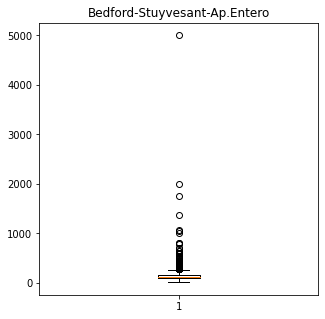

100.0 166.0 101


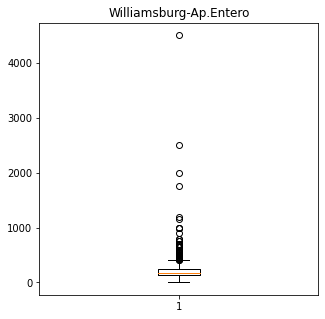

130.0 240.0 87


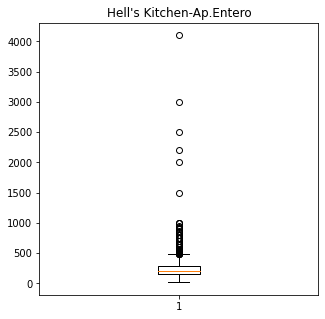

160.0 288.5 84


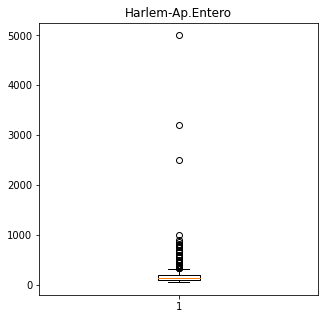

105.0 198.0 63


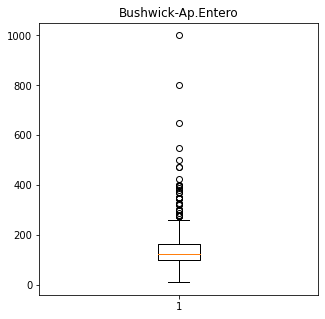

99.0 165.0 40


In [ ]:
vector1=["Bedford-Stuyvesant","Williamsburg","Hell's Kitchen","Harlem","Bushwick"]
vector2=["Bedford-Stuyvesant-Ap.Entero","Williamsburg-Ap.Entero","Hell's Kitchen-Ap.Entero","Harlem-Ap.Entero","Bushwick-Ap.Entero"]
for i in range (0,5):
  a=vector1[i]
  b=vector2[i]
  graficar(a,b)

Graficamos los diagramas de cajas respecto al precio de los airbnb que son habitaciones privadas en los 5 barrios más populares.

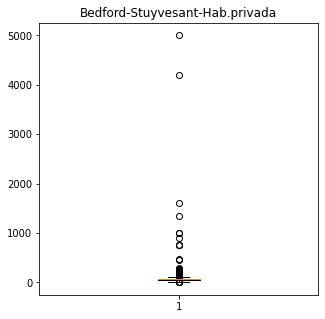

46.0 75.0 117


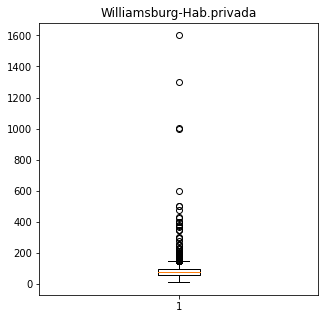

60.0 95.0 107


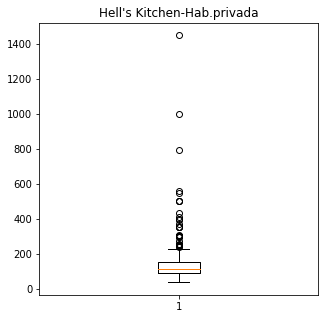

90.75 150.0 39


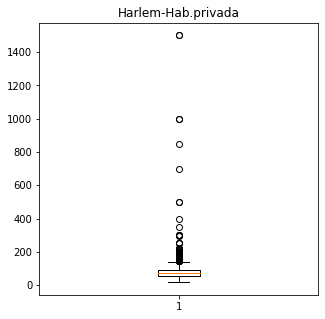

55.0 90.0 103


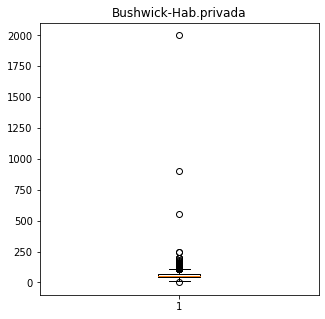

45.0 70.0 70


In [ ]:
vector1=["Bedford-Stuyvesant","Williamsburg","Hell's Kitchen","Harlem","Bushwick"]
vector2=["Bedford-Stuyvesant-Hab.privada","Williamsburg-Hab.privada","Hell's Kitchen-Hab.privada","Harlem-Hab.privada","Bushwick-Hab.privada"]
for i in range (0,5):
  a=vector1[i]
  b=vector2[i]
  graficar2(a,b)

Teniendo en cuenta los diversos diagramas de cajas que se han obtenido, podemos sacar las siguientes conclusiones. Lo primero y es algo que a priori parece evidente es que el primer cuartil de los apartamentos enteros está por encima del tercer cuartil de las habitaciones privadas, por tanto se concluye que la gran mayoría de los apartamentos enteros son más caros que la mayoría de las habitaciones privadas como era previsible.

Otro dato importante es que al tratarse de precios más bajos en el caso de las habitaciones privadas, el rango intercuartílico, en cada uno de los 5 barrios es más pequeño, que el de los apartamentos enteros, esto quiere decir que el 50% de los airbnb que son habitaciones privadas y que tienen precios medios, tienen precios más parejos, en cambio ese 50% en el caso de los apartamentos enteros tiene precios más dispares. A pesar de esto, es cierto que observando los datos vemos como ese rango es proprcional tanto en las habitaciones privadas como en los apartamentos enteros en cada uno de los barrios, ya que Hell's Kitchen es el que tiene un mayor iqr en los apartamentos enteros pero también los tiene en las habitaciones privadas.

Por tanto, se puede concluir que en cuanto a los barrios, el más caro generalmente es Hell`s Kitchen, mientras que los más baratos son Bedford-Stuyvesant y Bushwick. Además se puede decir que los precios de las habitaciones privadas son mucho menores que los de los apartamentos enteros, aunque por lo general son proporcionales, es decir, si los apartamentos de ese barrio son los más caros, por lo general, las habitaciones privadas de ese barrio, serán las más caras.

## Pregunta 4. Crecimiento número de reseñas en la app



En este último apartado queremos comprobar si es cierto que el número de reseñas ha ido aumentando con los años. Para ello creamos un nuevo dataframe que contendrá el id de cada airbnb y la fecha de la última reseña.

In [ ]:
datos4 = datosraw[['id','last_review']]
datos4.head()


,id,last_review
0,2539,2018-10-19
1,2595,2019-05-21
2,3647,NaN
3,3831,2019-07-05
4,5022,2018-11-19


In [ ]:
datos4.shape

(48895, 2)

Como se ha explicado en el apartado 1, la columna "last_review" contiene valores NaN, pero al contrario que como se ha resuelto en ese apartado, en este apartado se deben eliminar esos airbnb, ya que a pesar de tratarse de un 25% de los datos totales, asignar una fecha aleatoria en este caso, supondría que el estudio se realizara de manera incorrecta. Es un dato que debe ser exacto para que sea válido, por tanto, eliminamos los airbnb con valores NaN

In [ ]:
datos4 = datos4[datos4['last_review'].notna()]
datos4.shape

(38843, 2)

In [ ]:
datos4.head()

,id,last_review
0,2539,2018-10-19
1,2595,2019-05-21
3,3831,2019-07-05
4,5022,2018-11-19
5,5099,2019-06-22


Debido al formato de fecha que nos ha sido aportado por el dataframe inicial, el único dato de interés para este apartado es el año en el cual se realizo la última reseña, por tanto, nuestra columna last_review pasará a ser solo el año.

In [ ]:
datos4.last_review = datos4.last_review.str.split("-", n=1).str[0]
datos4.head()

,id,last_review
0,2539,2018
1,2595,2019
3,3831,2019
4,5022,2018
5,5099,2019


Una vez tenemos el dataframe adecuado debemos agrupar por años los airbnb y contar cuantos airbnb tienen su últimaa reseñaen cada uno de los años.

In [ ]:
years = pd.DataFrame(datos4.groupby(datos4.last_review).count())
years=years.reset_index()
years.head()

,last_review,id
0,2011,7
1,2012,25
2,2013,48
3,2014,199
4,2015,1393


Se procede a realizar un gráfico de barras en el cual el eje x representa cada  uno de los años en los cuál es hay alguna reseña y el eje y representa el número total de reseñas que se han puesto en cada uno de estos años.

<function matplotlib.pyplot.show(*args, **kw)>

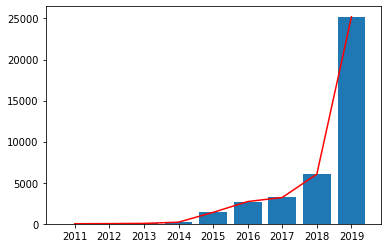

In [ ]:
plt.bar(years['last_review'],years['id'])
plt.plot(years['last_review'],years['id'], color='red')
plt.show

Observando el gráfico de barras realizado se puede ver claramente como efectivamente el número de reseñas ha aumentado significativamente con los años, ya que se puede observar como las barras van aumentando su tamaño con el paso de los años, teniendo un crecimiento exponencial.